In [348]:
# importing libraries and setting print size
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# to change the data type into str
data_type = {'mage': float,
             'fage': float,
             'npvis': float}

# read the file from excel
file = './birthweight_low.xlsx'
# original data
birth = pd.read_excel(io = file)

#check the output of data
birth.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [349]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [350]:
# Check if have missing value in data
birth.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [351]:
# check the columns with missing values
print(f"""
meduc
----------
{birth['meduc'].describe()}

npvis
----------
{birth['npvis'].describe()}

feduc
----------
{birth['feduc'].describe()}""")


meduc
----------
count    193.000000
mean      13.911917
std        2.055864
min        8.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: meduc, dtype: float64

npvis
----------
count    193.000000
mean      11.601036
std        4.267293
min        2.000000
25%       10.000000
50%       12.000000
75%       12.000000
max       35.000000
Name: npvis, dtype: float64

feduc
----------
count    189.000000
mean      13.846561
std        2.634217
min        1.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: feduc, dtype: float64


In [352]:
# make a copy of data in case might mess up the original data
birth_copy = pd.DataFrame.copy(birth)

# decided to fill in the missing values as mean
fill = 14
birth_copy['meduc'] = birth_copy['meduc'].fillna(value = fill)

fill = 12
birth_copy['npvis'] = birth_copy['npvis'].fillna(value = fill)

fill = 14
birth_copy['feduc'] = birth_copy['feduc'].fillna(value = fill)

In [353]:
# get the basic idea of the corr between y and continuous data
continuous_data = ['mage', 'meduc','fage', 'feduc', 'cigs','drink', 'bwght']

birth_corr = birth_copy[continuous_data].corr(method = 'pearson')
birth_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
feduc    0.13
meduc    0.09
fage    -0.40
mage    -0.46
cigs    -0.57
drink   -0.74
Name: bwght, dtype: float64

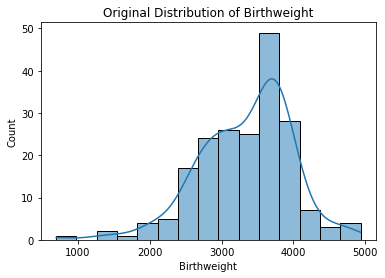

In [354]:
# using histograms to check features for skewness
sns.histplot(data   = birth_copy,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")

plt.show()

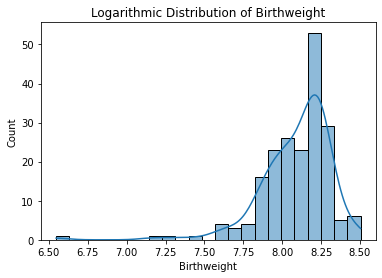

In [355]:
# check logarithmic distribution of bwght
birth_copy['log_bwght'] = np.log(birth_copy['bwght'])

sns.histplot(data   = birth_copy,
             x      = 'log_bwght',
             kde    = True)

plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")

plt.show()

In [356]:
# print all the columns with '+'
for column in birth:
    print(column, '+')

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +


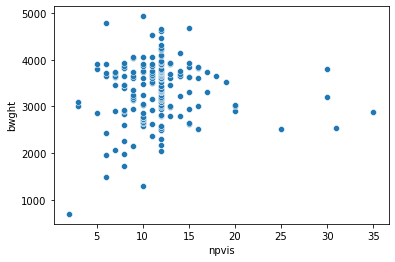

In [357]:
# developing scatterplot for count data
sns.scatterplot(x    = 'npvis',
                y    = 'bwght',
                data = birth_copy)

plt.show()

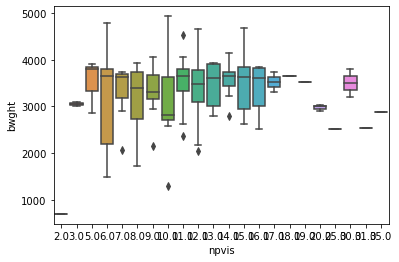

In [358]:
# developing boxplot for count data
sns.boxplot(x    = 'npvis',
            y    = 'bwght',
            data = birth_copy)

plt.show()

In [359]:
print(f"""
monpre
----------
{birth_copy['monpre'].value_counts(sort = True).sort_index()}

npvis
----------
{birth_copy['npvis'].value_counts(sort = True).sort_index()}
""")


monpre
----------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64

npvis
----------
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    68
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name: npvis, dtype: int64



In [360]:
# set the bin of fage into 20 to 34, 35 to 44, and above 45
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1470584/
for num in birth_copy['fage']:
    if num < 35:
        birth_copy['fage'].replace(to_replace = num, 
                                   value = "20_34", 
                                   inplace = True)
    elif num < 45:
        birth_copy['fage'].replace(to_replace = num, 
                                   value = "35_44", 
                                   inplace = True)
    else:
        birth_copy['fage'].replace(to_replace = num, 
                                   value = "45_75", 
                                   inplace = True)
        
# set the bin for mage as 45  
for num in birth_copy['mage']:
    if num < 45:
        birth_copy['mage'].replace(to_replace = num, 
                                   value = "44_lower", 
                                   inplace = True)
    else:
        birth_copy['mage'].replace(to_replace = num, 
                                   value = "45_over", 
                                   inplace = True)

# prenatal care starts as soon as you think you're pregnant
# https://www.mayoclinic.org/healthy-lifestyle/pregnancy-week-by-week/in-depth/prenatal-care/art-20044581
for num in birth_copy['monpre']:
    if num == 1:
        birth_copy['monpre'].replace(to_replace = num, 
                                   value = "1", 
                                   inplace = True)
    elif num == 2:
        birth_copy['monpre'].replace(to_replace = num, 
                                   value = "2", 
                                   inplace = True)
    else:
        birth_copy['monpre'].replace(to_replace = num, 
                                   value = "late", 
                                   inplace = True)
        
# The number of visits in a typical pregnancy usually total about 10 to 15
# https://www.whattoexpect.com/pregnancy/pregnancy-health/prenatal-appointments/
for num in birth_copy['npvis']:
    if num > 11 and num < 16:
        birth_copy['npvis'].replace(to_replace = num, 
                                   value = "normal", 
                                   inplace = True)
    elif num < 10:
        birth_copy['npvis'].replace(to_replace = num, 
                                   value = "too_less", 
                                   inplace = True)
    else:
        birth_copy['npvis'].replace(to_replace = num, 
                                   value = "unusual", 
                                   inplace = True)

birth_copy['part_edu'] = birth_copy['meduc'] + birth_copy['feduc']
birth_copy['drink_cigs'] = birth_copy['cigs'] + birth_copy['drink']
birth_copy['mwhte_fwhte'] = birth_copy['mwhte'] + birth_copy['fwhte']
birth_copy['fblck_mblck'] = birth_copy['fblck'] + birth_copy['mblck']
birth_copy['foth_moth'] = birth_copy['foth'] + birth_copy['moth']

for num in birth_copy['mwhte_fwhte']:
    if num == 2:
        birth_copy['mwhte_fwhte'].replace(to_replace = num, 
                                   value = "yes", 
                                   inplace = True)
    else:
        birth_copy['mwhte_fwhte'].replace(to_replace = num, 
                                   value = "no", 
                                   inplace = True)
for num in birth_copy['fblck_mblck']:
    if num == 2:
        birth_copy['fblck_mblck'].replace(to_replace = num, 
                                   value = "yes", 
                                   inplace = True)
    else:
        birth_copy['fblck_mblck'].replace(to_replace = num, 
                                   value = "no", 
                                   inplace = True)
for num in birth_copy['foth_moth']:
    if num == 2:
        birth_copy['foth_moth'].replace(to_replace = num, 
                                   value = "yes", 
                                   inplace = True)
    else:
        birth_copy['foth_moth'].replace(to_replace = num, 
                                   value = "no", 
                                   inplace = True)
    
        

In [361]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

birth_dummies = pd.get_dummies(data = birth_copy, columns = ["fage", "mage",
                                                            "monpre", "npvis",
                                                            "mwhte_fwhte", "fblck_mblck",
                                                            "foth_moth"])

birth_dummies.head(10)

,meduc,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,part_edu,drink_cigs,fage_20_34,fage_35_44,fage_45_75,mage_44_lower,mage_45_over,monpre_1,monpre_2,monpre_late,npvis_normal,npvis_too_less,npvis_unusual,mwhte_fwhte_no,mwhte_fwhte_yes,fblck_mblck_no,fblck_mblck_yes,foth_moth_no,foth_moth_yes
0,14.0,14.0,4,7,23,9,1,0,1,0,0,1,0,697,6.546785,28.0,32,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
1,12.0,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,7.162397,23.0,36,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0
2,12.0,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,7.306531,24.0,33,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
3,16.0,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,7.450080,32.0,31,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1
4,12.0,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,7.578657,24.0,30,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
5,11.0,8.0,4,9,16,14,0,1,0,0,1,0,0,1984,7.592870,19.0,30,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
6,12.0,12.0,9,9,17,12,1,0,1,0,0,1,0,2050,7.625595,24.0,29,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0
7,14.0,11.0,9,8,15,13,0,1,0,0,1,0,0,2068,7.634337,25.0,28,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0
8,12.0,14.0,8,9,14,9,1,1,0,0,1,0,0,2148,7.672292,26.0,23,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0
9,12.0,16.0,9,9,13,6,0,0,1,0,0,1,0,2180,7.687080,28.0,19,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0


In [364]:
import statsmodels.formula.api as smf

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """bwght ~ mage_45_over +
part_edu +
monpre_1 +
monpre_2 +
monpre_late +
npvis_normal +
npvis_too_less +
npvis_unusual +
fage_20_34 +
fage_35_44 +
fage_45_75 +
drink +
drink_cigs +
mblck +
moth +
fblck +
foth +
mwhte_fwhte_yes +
foth_moth_yes""",
data = birth_dummies)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     32.05
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.75e-43
Time:                        21:57:19   Log-Likelihood:                -1418.7
No. Observations:                 196   AIC:                             2869.
Df Residuals:                     180   BIC:                             2922.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1607.0822    102.863     

In [365]:
# drop the first dummies
birth_weight = birth_dummies.drop([ 'fage_20_34', 'mwhte_fwhte_no', 'fblck_mblck_no', 'foth_moth_no', 
                                  'meduc', 'feduc', 'cigs'], axis = 1)

In [366]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression    # linear regression (scikit-learn)

# preparing explanatory variable data
birth_data = birth_weight.drop(['bwght',
                              'log_bwght',
                              'omaps',
                              'fmaps'],
                               axis = 1)


# preparing response variables
birth_target = birth_weight.loc[ : , 'bwght']
log_birth_copy_target = birth_weight.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 23)
y-side: (147,)


Testing Data
------------
X-side: (49, 23)
y-side: (49,)



In [369]:
x_variables = ["mage_45_over", "part_edu", "monpre_1",
               "monpre_2","monpre_late", "drink", "drink_cigs",
               "npvis_unusual", "npvis_normal", "fage_35_44", "fage_45_75","mblck",
               "mwhte", "moth", "fblck", "mwhte_fwhte_yes", "foth_moth_yes"]

In [371]:
ols_data = birth_weight.loc[:, x_variables]
bitrh_target = birth_weight.loc[:, 'bwght']

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_data,     # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4)) # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4))  # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7322
OLS Testing Score  : 0.6109
OLS Train-Test Gap : 0.1213


In [372]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3708.23)
('mage_45_over', -284.64)
('part_edu', 25.62)
('monpre_1', -48.59)
('monpre_2', 27.29)
('monpre_late', 21.3)
('drink', -78.5)
('drink_cigs', -35.88)
('npvis_unusual', -82.89)
('npvis_normal', 55.48)
('fage_35_44', -16.84)
('fage_45_75', -194.29)
('mblck', -27.26)
('mwhte', 65.77)
('moth', -38.51)
('fblck', 130.93)
('mwhte_fwhte_yes', 65.77)
('foth_moth_yes', -3.19)


In [373]:
import sklearn.linear_model

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7288
Lasso Testing Score  : 0.635
Lasso Train-Test Gap : 0.0938


In [374]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3700.31)
('drink', -75.26)
('male', 33.18)
('mwhte', 2.12)
('mblck', 0.0)
('moth', -83.89)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('part_edu', 17.1)
('drink_cigs', -35.51)
('fage_35_44', -0.0)
('fage_45_75', -159.86)
('mage_44_lower', 264.39)
('mage_45_over', -0.0)
('monpre_1', -14.88)
('monpre_2', 25.89)
('monpre_late', -0.0)
('npvis_normal', 40.72)
('npvis_too_less', -0.0)
('npvis_unusual', -45.45)
('mwhte_fwhte_yes', 0.0)
('fblck_mblck_yes', -0.0)
('foth_moth_yes', -0.0)


In [375]:
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)
    
    
    
    
    
    
    

('intercept', 3700.31)
('drink', -75.26)
('male', 33.18)
('mwhte', 2.12)
('moth', -83.89)
('fblck', 0.0)
('part_edu', 17.1)
('drink_cigs', -35.51)
('fage_45_75', -159.86)
('mage_44_lower', 264.39)
('monpre_1', -14.88)
('monpre_2', 25.89)
('npvis_normal', 40.72)
('npvis_unusual', -45.45)
('fblck_mblck_yes', -0.0)


In [376]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7252
Testing Score : 0.6401
ARD Train-Test Gap : 0.0851


In [377]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3856.08)
('drink', -77.09378)
('male', 0.00203)
('mwhte', 0.00079)
('mblck', 0.00012)
('moth', -79.65051)
('fwhte', -4e-05)
('fblck', 0.00046)
('foth', -0.00058)
('part_edu', 18.27066)
('drink_cigs', -37.17264)
('fage_35_44', 0.00013)
('fage_45_75', -137.81854)
('mage_44_lower', 142.07164)
('mage_45_over', -142.07164)
('monpre_1', -0.00127)
('monpre_2', 0.00171)
('monpre_late', -0.00034)
('npvis_normal', 21.50185)
('npvis_too_less', -0.00012)
('npvis_unusual', -26.16561)
('mwhte_fwhte_yes', 0.00079)
('fblck_mblck_yes', 6e-05)
('foth_moth_yes', -0.00167)


In [378]:
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)
    
    
    
    
    
    
    

('intercept', 3856.08)
('drink', -77.09378)
('male', 0.00203)
('mwhte', 0.00079)
('mblck', 0.00012)
('moth', -79.65051)
('fwhte', -4e-05)
('fblck', 0.00046)
('foth', -0.00058)
('part_edu', 18.27066)
('drink_cigs', -37.17264)
('fage_35_44', 0.00013)
('fage_45_75', -137.81854)
('mage_44_lower', 142.07164)
('mage_45_over', -142.07164)
('monpre_1', -0.00127)
('monpre_2', 0.00171)
('monpre_late', -0.00034)
('npvis_normal', 21.50185)
('npvis_too_less', -0.00012)
('npvis_unusual', -26.16561)
('mwhte_fwhte_yes', 0.00079)
('fblck_mblck_yes', 6e-05)
('foth_moth_yes', -0.00167)


In [379]:
# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler  # standard scaler

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(birth_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(birth_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-3.79,-2.13,-1.10,-0.51,-1.69,-0.59,-0.55,-0.95,-0.65,-0.95,-0.56,-0.63,-0.61,-0.71,-0.64
25%,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.91,-0.69,-1.10,-0.51,-1.69,-0.59,-0.55,-0.95,-0.65,-0.95,-0.56,-0.63,-0.61,-0.71,-0.64
50%,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,0.06,-0.04,0.91,-0.51,0.59,-0.59,-0.55,-0.95,-0.65,-0.95,-0.56,-0.63,-0.61,-0.71,-0.64
75%,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,1.02,0.61,0.91,-0.51,0.59,1.69,-0.55,1.05,1.54,1.05,-0.56,1.58,1.64,1.40,1.56
max,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,1.50,2.56,0.91,1.97,0.59,1.69,1.83,1.05,1.54,1.05,1.78,1.58,1.64,1.40,1.56


In [380]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = birth_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(birth_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
drink               8.964077
male                0.247397
mwhte               0.197288
mblck               0.236230
moth                0.226572
fwhte               0.226572
fblck               0.224984
foth                0.214364
part_edu           17.302062
drink_cigs         58.964806
fage_35_44          0.247892
fage_45_75          0.162432
mage_44_lower       0.192498
mage_45_over        0.192498
monpre_1            0.176879
monpre_2            0.249349
monpre_late         0.208351
npvis_normal        0.249349
npvis_too_less      0.182294
npvis_unusual       0.204082
mwhte_fwhte_yes     0.197288
fblck_mblck_yes     0.223344
foth_moth_yes       0.206242
dtype: float64


Dataset AFTER Scaling
----------------------
drink              1.0
male               1.0
mwhte              1.0
mblck              1.0
moth               1.0
fwhte              1.0
fblck              1.0
foth               1.0
part_edu           1.0
drink_cigs       

In [381]:
# Develop training and testing sets using the non-standardized dataset
x_train, x_test, y_train, y_test = train_test_split(
            x_scaled_df,
            birth_target,
            test_size = 0.25,
            random_state = 219)

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 7)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.5754
KNN Testing Score : 0.4174
KNN Train-Test Gap: 0.158


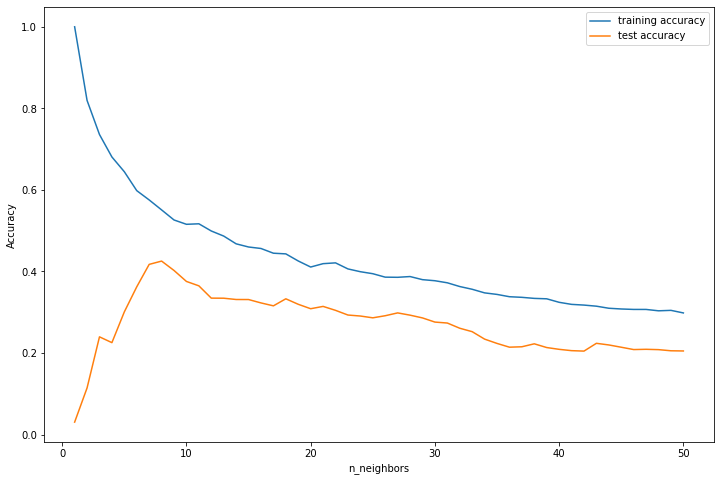

In [382]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [383]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 8


In [384]:
# comparing results

print(f"""
Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      ----------
OLS        {lr_train_score}           {lr_test_score}          {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
ARD*        {ard_train_score}           {ard_test_score}          {ard_test_gap}

* Final model""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      ----------
OLS        0.7322           0.6109          0.1213
Lasso      0.7288           0.635          0.0938
ARD        0.7252           0.6401          0.0851

* Final model
